C: Regression Activities

## Activity3: Build a regression model to predict customer purchasing behaviour.

**Task 1 : Create a notebook in ADS or any IDE with name “cohort-project-Act2” , import required packages including sklearn and read the dataset given**



In [ ]:
#Import required packages
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import feature_selection as fs
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
import math

#make plots appear inline in the notebook
%matplotlib inline


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
filePath='/content/gdrive/My Drive/'
filePath+= 'PAI0221A/2.AML/Lab/'

In [ ]:
# load csv to datafram
df = pd.read_csv(filePath+'Clean_data.csv')

**Task 2 : Check for duplicate rows ,missing values and find out the imbalance of the dataset**

In [ ]:
#check for null values
df.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
Age                     0
AgeGroup                0
dtype: int64

In [ ]:
df[['BikeBuyer','Gender']].value_counts()

BikeBuyer  Gender
0          F         5881
           M         5068
1          M         3222
           F         2233
dtype: int64

In [ ]:
df['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

**Task 3 : Encode the categorical columns after checking the info() for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16404 non-null  int64 
 1   FirstName             16404 non-null  object
 2   LastName              16404 non-null  object
 3   AddressLine1          16404 non-null  object
 4   City                  16404 non-null  object
 5   StateProvinceName     16404 non-null  object
 6   CountryRegionName     16404 non-null  object
 7   PostalCode            16404 non-null  object
 8   PhoneNumber           16404 non-null  object
 9   BirthDate             16404 non-null  object
 10  Education             16404 non-null  object
 11  Occupation            16404 non-null  object
 12  Gender                16404 non-null  object
 13  MaritalStatus         16404 non-null  object
 14  HomeOwnerFlag         16404 non-null  int64 
 15  NumberCarsOwned       16404 non-null

In [ ]:
df.groupby(['CountryRegionName','City'])['CustomerID'].count()

CountryRegionName  City          
Australia          Bendigo           92
                   Brisbane          96
                   Caloundra         98
                   Cloverdale        72
                   Coffs Harbour     88
                                     ..
United States      Walla Walla       94
                   West Covina       71
                   Woodburn          77
                   Woodland Hills    86
                   Yakima            88
Name: CustomerID, Length: 268, dtype: int64

In [ ]:
df['City'].value_counts()

London              379
Paris               341
Beaverton           190
Burien              188
Chula Vista         185
                   ... 
City Of Commerce      1
Clarkston             1
Cedar Park            1
Charlotte             1
Cedar City            1
Name: City, Length: 267, dtype: int64

In [ ]:
df.groupby(['CountryRegionName', 'City'])['City'].value_counts().nlargest(10)

CountryRegionName  City           City         
United Kingdom     London         London           379
France             Paris          Paris            341
United States      Beaverton      Beaverton        190
                   Burien         Burien           188
                   Chula Vista    Chula Vista      185
                   Bellingham     Bellingham       183
                   Concord        Concord          183
                   Berkeley       Berkeley         177
                   Burbank        Burbank          174
                   Beverly Hills  Beverly Hills    170
Name: City, dtype: int64

In [ ]:
df[['CountryRegionName','City']].value_counts()

CountryRegionName  City       
United Kingdom     London         379
France             Paris          341
United States      Beaverton      190
                   Burien         188
                   Chula Vista    185
                                 ... 
                   Sammamish        1
                   Branch           1
                   Braintree        1
                   Bradenton        1
                   Bountiful        1
Length: 268, dtype: int64

In [ ]:
#specify the categorical columns
categorical_columns = ['Education','Occupation','Gender','MaritalStatus','AgeGroup','HomeOwnerFlag']

for cat in categorical_columns:
  print(df[cat].unique())

['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['M' 'F']
['M' 'S']
['25-45' '0-25' '45-55' '55-120']
[1 0]


In [ ]:
#specify the numerical columns
numerical_columns = ['NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome']

In [ ]:
def encode_string(cat_feature):
	## First encode the strings to numeric categories
	enc = preprocessing.LabelEncoder()
	enc.fit(cat_feature)
	enc_cat_feature = enc.transform(cat_feature)
	
	## Now, apply one hot encoding
	ohe = preprocessing.OneHotEncoder()
	encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
	return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

In [ ]:
alist = [[] for _ in range(df.shape[0])]
Cat_Features = np.array(alist)

for col in categorical_columns:
	temp = encode_string(df[col])
	print(col,temp.shape)
	Cat_Features = np.concatenate([Cat_Features, temp], axis=1)

#used later to identify columns to start scaling
start_num_idx = Cat_Features.shape[1]
print(start_num_idx)
print(Cat_Features.shape)
print(Cat_Features[:2,:]) #first two sample rows

Education (16404, 5)
Occupation (16404, 5)
Gender (16404, 2)
MaritalStatus (16404, 2)
AgeGroup (16404, 4)
HomeOwnerFlag (16404, 2)
20
(16404, 20)
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]]


In [ ]:
Num_Features = np.array(df[numerical_columns])
print(Num_Features.shape)


(16404, 4)


In [ ]:
#Join the categorical and numerical columns together
Features = np.concatenate([Cat_Features, Num_Features], axis=1)
np.set_printoptions(suppress=True) #turn off scientific display
print(Features[:2,:],Features.shape)

[[     1.      0.      0.      0.      0.      0.      0.      0.      1.
       0.      0.      1.      1.      0.      0.      1.      0.      0.
       0.      1.      0.      0.      2. 137947.]
 [     1.      0.      0.      0.      0.      0.      0.      0.      1.
       0.      0.      1.      0.      1.      0.      1.      0.      0.
       1.      0.      1.      3.      3. 101141.]] (16404, 24)


**Task 4 : Split the dataset with 70:30 based on Bikebuyer and create some random samples if needed**

In [ ]:
nr.seed(777)
labels=np.array(np.log(df['AveMonthSpend'])) #log of AveMonthSpend

print(labels)
indx = range(Features.shape[0])
test_size = int(0.3*Features.shape[0])
indx = ms.train_test_split(indx,test_size = test_size)

x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]]) #note in log scale

x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]]) #note in log scale


[4.48863637 4.76217393 4.81218436 ... 4.36944785 4.17438727 4.21950771]


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(start_num_idx)

(11483, 24) (11483,)
(4921, 24) (4921,)
20


**Task 5 : Build Linear regression model**

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train[:,start_num_idx:])

x_train[:,start_num_idx:] = scaler.transform(x_train[:,start_num_idx:])
x_test[:,start_num_idx:] = scaler.transform(x_test[:,start_num_idx:])
print(x_train.shape)
x_train[:3,:]

(11483, 24)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.31840874, -0.65695697, -0.60426553, -0.51972654],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.31840874, -0.65695697, -0.60426553, -1.34519292],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
  

In [ ]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

**Task 6 : Score and evaluate the model and print the metrics**

In [ ]:
#print model parameters
print(lin_mod.intercept_)
print(lin_mod.coef_,lin_mod.coef_.shape[0])

0.0
[-2.03685398e+10 -2.03685398e+10 -2.03685398e+10 -2.03685398e+10
 -2.03685398e+10 -1.72263252e+11 -1.72263252e+11 -1.72263252e+11
 -1.72263252e+11 -1.72263252e+11  7.30877015e+10  7.30877015e+10
  8.52999765e+09  8.52999765e+09  2.15581541e+10  2.15581541e+10
  2.15581541e+10  2.15581541e+10  8.94559387e+10  8.94559387e+10
 -6.41787052e-03  1.96205139e-01 -1.68603659e-03  8.72974396e-02] 24


In [ ]:
def print_metrics(y_true, y_predicted, n_parameters):
	## First compute R^2 and the adjusted R^2
	r2= sklm.r2_score(y_true, y_predicted)
	r2_adj = r2 - (n_parameters -1) / (y_true.shape[0] - n_parameters) * (1 - r2)

	## Print the usual metrics and the R^2 values
	print('Mean Square Error	= '+ str(sklm.mean_squared_error(y_true,y_predicted)))
	print('Root Mean Square Error	= '+ str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
	print('Mean Absolute Error	= '+ str(sklm.mean_absolute_error(y_true, y_predicted)))
	print('R^2			= '+ str(r2))
	print('Adjusted R^2		= '+ str(r2_adj))

In [ ]:
y_score = lin_mod.predict(x_test)

y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
print(y_score_untransform)
print(y_test_untransform)
print_metrics(y_test_untransform,y_score_untransform, lin_mod.coef_.shape[0]+1)

[104.7856153   76.70257673  62.71372494 ...  47.97727873 112.22659752
  43.19398692]
[ 94.  73.  66. ...  47. 119.  45.]
Mean Square Error	= 13.870152634184876
Root Mean Square Error	= 3.724265381814899
Mean Absolute Error	= 2.9043737838596684
R^2			= 0.981236588904915
Adjusted R^2		= 0.981144611399547


**Task 7 : Plot the residuals and visualise accordingly Plot QQ Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


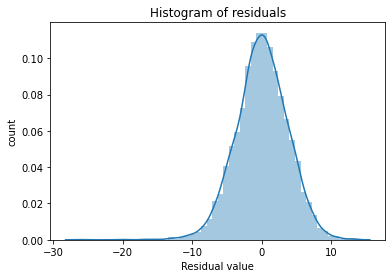

In [ ]:
def hist_resids(y_test, y_score):
	resids = np.subtract(y_test.reshape(-1,1),y_score.reshape(-1,1)) #first compute vector of residuals
	sns.distplot(resids) ##now make the residual plots
	plt.title('Histogram of residuals')
	plt.xlabel('Residual value')
	plt.ylabel('count')
hist_resids(y_test_untransform, y_score_untransform)

In [ ]:
resid_check = np.subtract(y_test_untransform.reshape(-1,1),y_score_untransform.reshape(-1,1))
print(np.std(resid_check),np.mean(resid_check))


3.7242551097414163 0.008747099509305543


Residuals are normally distributed ( fitted assumption of linear model ), with standard deviation of 3.7

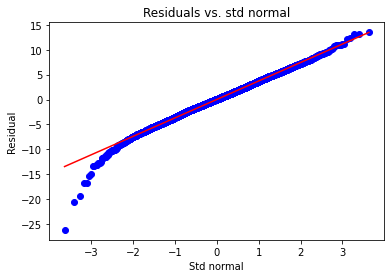

In [ ]:
def resid_qq(y_test, y_score):
	##Firstly compute vector of residuals
	resids = np.subtract(y_test.reshape(-1,1),y_score.reshape(-1,1))
	##now make the residual plots
	ss.probplot(resids.flatten(), plot=plt)
	plt.title('Residuals vs. std normal')
	plt.xlabel('Std normal')
	plt.ylabel('Residual')
	plt.show()

resid_qq(y_test_untransform, y_score_untransform)
#resid_qq(y_test, y_score)

As with the histogram, the QQ normal plot indicates that the residuals are close to normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


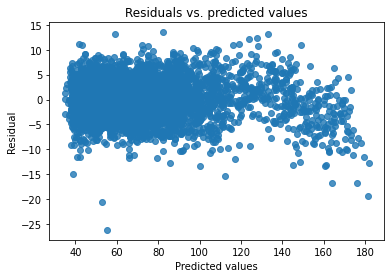

In [ ]:
def resid_plot(y_test, y_score):
	##Firstly, computer vector of residuals.
	resids = np.subtract(y_test.reshape(-1,1),y_score.reshape(-1,1))
	##now make the residual plots
	sns.regplot(y_score, resids, fit_reg=False)
	plt.title('Residuals vs. predicted values')
	plt.xlabel('Predicted values')
	plt.ylabel('Residual')
	plt.show()

#resid_plot(y_test, y_score)
resid_plot(y_test_untransform, y_score_untransform)

Residuals appears to be evenly dispersed over predicted values, with few bad predictions of residuals over 15.

## TESTING MODEL

There are 2 sets of test data:

1. One set was derived from the merged AdvWorksCusts, BikeBuyer and AveMonthSpend csv files, which are split into training and test set. In this test set, one examine the metrics as given in tasks in regression and classification. This is already explained in Setting up Classification Model tasks and Setting up Regression Model tasks.

2. The other test set was given in file AW_test csv file. The actual results of this data lies with Lithan Hall, so the only way is to receive the feedback grade. Because of problems posting the results to online excel, the results was sent directly to instructor/assessor. 


**Read AW_Test and cleanup**

In [ ]:
missing_value_formats = ['n.a.','?','NA','n/a','na','--','null']
aw_test = pd.read_csv(filePath+'AW_test.csv',na_values=missing_value_formats)
aw_test.drop_duplicates(subset='CustomerID',keep='last', inplace=True)
print(aw_test.columns,aw_test.shape)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object') (500, 23)


Checking duplicates and removal

In [ ]:
aw_test.isnull().sum()

CustomerID                0
Title                   496
FirstName                 0
MiddleName              216
LastName                  0
Suffix                  499
AddressLine1              0
AddressLine2            487
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
dtype: int64

In [ ]:
aw_test.drop(columns=['Title','MiddleName','Suffix','AddressLine2'], inplace=True)

In [ ]:
aw_test.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [ ]:
def convert_bdate_age(birthDate, collectionDate):
	diff=collectionDate - birthDate
	age = diff.dt.days.div(365).astype(int)
	return age

aw_cDate = pd.to_datetime('1998-01-01')
aw_test['BirthDate'] = pd.to_datetime(df['BirthDate'])
aw_bDate = aw_test['BirthDate']
aw_age = convert_bdate_age(aw_bDate, aw_cDate)
aw_test['Age'] = aw_age

In [ ]:
numGroups = 10
bins = [0,25,45,55,120]
aw_ageCats = pd.cut(aw_test['Age'],bins=bins, labels=['0-25','26-45','46-55','56-120'])
aw_test['AgeGroup'] = aw_ageCats

In [ ]:
aw_test[aw_test['Age']==26]

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AgeGroup
411,24280,Peter,Shan,5949 Laurel Drive,Silverwater,New South Wales,Australia,2264,1 (11) 500 555-0116,1971-11-16,Partial High School,Clerical,M,S,0,2,0,3,42318,26,26-45
412,18538,Ian,Mitchell,5186 Elmhurst Lane,Issaquah,Washington,United States,98027,752-555-0198,1971-02-19,Bachelors,Management,M,S,1,2,0,5,119578,26,26-45
413,23841,Sydney,Phillips,4919 Ham Court,Woodland Hills,California,United States,91364,108-555-0165,1971-08-03,Bachelors,Skilled Manual,F,M,1,1,1,1,62594,26,26-45
433,22863,Hunter,Thomas,8528 San Ramon Road,Lake Oswego,Oregon,United States,97034,861-555-0142,1971-07-09,Partial College,Professional,M,M,1,0,3,4,99777,26,26-45
434,27826,Nicolas,Xu,Buergermeister-ulrich-str 5000,München,Nordrhein-Westfalen,Germany,80074,1 (11) 500 555-0155,1971-09-21,Partial College,Clerical,M,S,0,1,4,4,52260,26,26-45
435,25356,Jonathan,Miller,5297 Carlos Dr.,Burien,Washington,United States,98168,757-555-0188,1971-03-07,Partial High School,Clerical,M,M,1,2,1,2,34609,26,26-45
437,16852,Kate,She,8713 Book Street,Burlingame,California,United States,94010,815-555-0144,1971-04-06,Bachelors,Management,F,S,1,4,2,4,128405,26,26-45
438,25360,Mason,James,2234 Teakwood Dr.,Los Angeles,California,United States,90012,590-555-0119,1971-11-19,High School,Skilled Manual,M,M,1,2,0,2,61309,26,26-45
440,18963,Amber,Collins,737 Castle Rock Road,Renton,Washington,United States,98055,328-555-0180,1971-09-04,Partial College,Skilled Manual,F,M,1,1,0,1,82391,26,26-45


In [ ]:
aw_test.to_csv(filePath + 'Clean_AW_test_Data.csv',index=False)

In [ ]:
aw_test = pd.read_csv(filePath + 'Clean_AW_test_Data.csv')

In [ ]:
aw_test.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'Age', 'AgeGroup'],
      dtype='object')

In [ ]:
aw_alist = [[] for _ in range(aw_test.shape[0])]
aw_Features = np.array(aw_alist)

for col in categorical_columns:
	temp = encode_string(aw_test[col])
	print(col,temp.shape)
	aw_Features = np.concatenate([aw_Features, temp], axis = 1)

aw_start_num_idx = aw_Features.shape[1]
print(aw_Features.shape)
print(aw_Features[:2,:]) #First two sample rows


Education (500, 5)
Occupation (500, 5)
Gender (500, 2)
MaritalStatus (500, 2)
AgeGroup (500, 4)
HomeOwnerFlag (500, 2)
(500, 20)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]]


In [ ]:
aw_Features = np.concatenate([aw_Features, np.array(aw_test[numerical_columns])],axis = 1)
aw_Features[:2,:]
aw_Features.shape

(500, 24)

In [ ]:
aw_scaler = preprocessing.StandardScaler().fit(aw_Features[:,aw_start_num_idx:])
aw_Features[:,aw_start_num_idx:] = aw_scaler.transform(aw_Features[:,aw_start_num_idx:])
print(aw_Features.shape)
aw_Features[:3,:]

(500, 24)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.35928859, -0.72107754,  1.6591036 ,  0.12653132],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.35928859,  0.53297036,  1.06909521,  0.45161083],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
  

**Regression testing**

In [ ]:
aw_scores = lin_mod.predict(aw_Features)
aw_scores_untransform = np.exp(aw_scores) #get back due to initial log

pd_scores = pd.Series(aw_scores_untransform)
pd_id = aw_test['CustomerID']
newdf = pd.concat([pd_id, pd_scores], axis=1)
newdf.reset_index()

np.savetxt(filePath + 'RegressionResults_GanesanRajeshKumar.csv',newdf, delimiter=',',fmt='%d %f')

**Classification testing**

Import Logistic model

In [ ]:
import pickle
logistic_mod = pickle.load(open(filePath + 'AML_ACT2_Logistic_Reg_Model.sav', 'rb'))

In [ ]:
def score_model(probe, threshold):
	return np.array([1 if x > threshold else 0 for x in probe[:,1]])

In [ ]:
threshold = 0.6
aw_probabilities = logistic_mod.predict_proba(aw_Features)
aw_scores = score_model(aw_probabilities, threshold)
pd_scores = pd.Series(aw_scores)
pd_id = aw_test['CustomerID']
newdf = pd.concat([pd_id, pd_scores], axis=1)
newdf.reset_index()
np.savetxt(filePath+'ClassificationResults_GanesanRajeshKumar.csv', newdf, delimiter=',',fmt='%d')
